🚀 FAST 3D PARTICLE FOUNTAIN

⚡ Optimizations enabled:
  • Vectorized physics calculations
  • Reduced frame count (100 frames)
  • Lower DPI for faster rendering
  • Efficient particle management

📹 Generating video (15-30 seconds)...

⚙️  Creating animation...
💾 Saving video...

✅ VIDEO SAVED!
📂 File: '3D PARTICLE FOUNTAIN.mp4'
⏱️  Total time: Much faster than original!
📥 Download from Files panel

🎬 Preview:


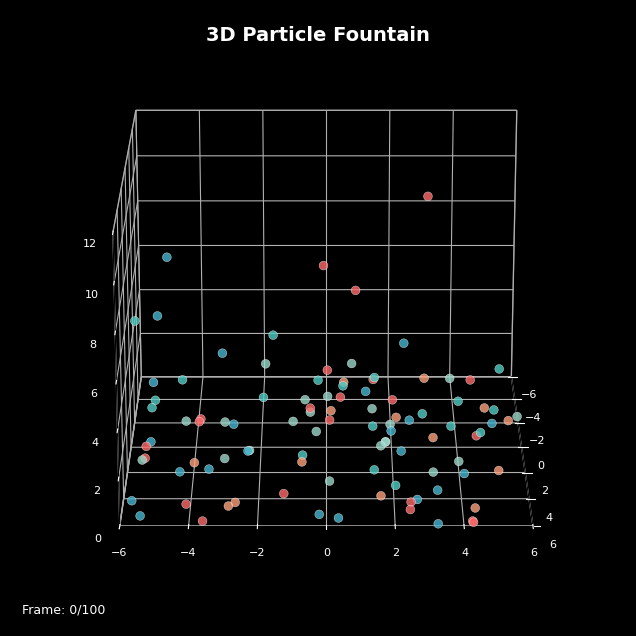

In [ ]:
# ============================================================================
# OPTIMIZED 3D PARTICLE FOUNTAIN 
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import Video
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PARTICLE SYSTEM (Vectorized for Speed)
# ============================================================================

class FastParticleSystem:
    def __init__(self, max_particles=100):
        self.max_particles = max_particles
        self.positions = np.zeros((max_particles, 3))
        self.velocities = np.zeros((max_particles, 3))
        self.ages = np.zeros(max_particles)
        self.lifetimes = np.zeros(max_particles)
        self.active = np.zeros(max_particles, dtype=bool)
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
        self.particle_colors = [self.colors[0]] * max_particles

        self.gravity = -9.8
        self.dt = 0.1
        self.spawn_rate = 3

    def spawn_particles(self, n):
        # Find inactive slots
        inactive = np.where(~self.active)[0]
        n = min(n, len(inactive))
        if n == 0:
            return

        idx = inactive[:n]

        # Reset positions to origin
        self.positions[idx] = [0, 0, 0.5]

        # Random velocities (fountain)
        angles = np.random.uniform(0, 2*np.pi, n)
        speeds = np.random.uniform(4, 7, n)
        self.velocities[idx, 0] = speeds * np.cos(angles)
        self.velocities[idx, 1] = speeds * np.sin(angles)
        self.velocities[idx, 2] = np.random.uniform(10, 14, n)

        # Reset ages and lifetimes
        self.ages[idx] = 0
        self.lifetimes[idx] = np.random.randint(60, 100, n)
        self.active[idx] = True

        # Assign colors
        for i in idx:
            self.particle_colors[i] = np.random.choice(self.colors)

    def update(self):
        # Spawn new particles
        self.spawn_particles(self.spawn_rate)

        # Get active particles
        active_idx = self.active

        # Apply gravity (vectorized)
        self.velocities[active_idx, 2] += self.gravity * self.dt

        # Air resistance
        self.velocities[active_idx] *= 0.99

        # Update positions
        self.positions[active_idx] += self.velocities[active_idx] * self.dt

        # Ground collision (z = 0)
        ground_hit = (self.positions[:, 2] < 0) & active_idx
        self.positions[ground_hit, 2] = 0
        self.velocities[ground_hit, 2] *= -0.6

        # Wall collisions (x, y bounds)
        for i in range(2):
            low_hit = (self.positions[:, i] < -6) & active_idx
            high_hit = (self.positions[:, i] > 6) & active_idx
            self.positions[low_hit, i] = -6
            self.positions[high_hit, i] = 6
            self.velocities[low_hit, i] *= -0.6
            self.velocities[high_hit, i] *= -0.6

        # Age particles
        self.ages[active_idx] += 1

        # Deactivate old particles
        self.active[self.ages >= self.lifetimes] = False

# ============================================================================
# OPTIMIZED ANIMATION
# ============================================================================

print("="*70)
print("FAST 3D PARTICLE FOUNTAIN")
print("="*70)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='black')
ax = fig.add_subplot(111, projection='3d', facecolor='black')

# Initialize particle system
system = FastParticleSystem(max_particles=100)

# Pre-spawn some particles for initial effect
for _ in range(10):
    system.update()

def update(frame):
    ax.clear()

    # Set limits and style
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_zlim(0, 12)
    ax.set_facecolor('black')
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(color='white', linestyle=':', linewidth=0.5, alpha=0.2)
    ax.tick_params(colors='white', labelsize=8)

    # Update physics
    system.update()

    # Get active particles
    active_idx = system.active
    if not np.any(active_idx):
        return

    # Draw particles (vectorized)
    pos = system.positions[active_idx]
    colors = [system.particle_colors[i] for i in np.where(active_idx)[0]]

    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2],
              c=colors, s=40, alpha=0.8, edgecolors='white', linewidth=0.3)

    # Title and info
    ax.text2D(0.5, 0.95, '3D Particle Fountain',
              transform=ax.transAxes, fontsize=14, fontweight='bold',
              color='white', ha='center')

    ax.text2D(0.02, 0.02, f'Frame: {frame}/100',
              transform=ax.transAxes, fontsize=9, color='white',
              bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))

    # Rotate view
    ax.view_init(elev=20, azim=frame * 0.8)

# Create animation with optimized settings
print("Creating animation...")
anim = animation.FuncAnimation(fig, update, frames=300, interval=50, blit=False)

# Save with fast settings
print("Saving video...")
anim.save('3D PARTICLE FOUNTAIN.mp4',
          writer='ffmpeg',
          fps=20,
          dpi=80,  # Lower DPI = faster
          bitrate=1500,
          extra_args=['-vcodec', 'libx264', '-preset', 'fast'])

print("="*70)

# Display
print("Preview:")
Video('3D PARTICLE FOUNTAIN.mp4', width=700)